In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch

In [2]:
competitions = sb.competitions()

In [28]:
euro = sb.matches(competition_id=55,season_id=282)
euro.tail()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
46,3930163,2024-06-16,22:00:00.000,Europe - UEFA Euro,2024,Serbia,England,0,1,available,...,2024-07-14T07:10:41.937955,1,Group Stage,VELTINS-Arena,Daniele Orsato,Dragan Stojković,Gareth Southgate,1.1.0,2,2
47,3930162,2024-06-16,19:00:00.000,Europe - UEFA Euro,2024,Slovenia,Denmark,1,1,available,...,2024-07-10T16:09:27.468163,1,Group Stage,MHPArena,Sandro Schärer,Matjaž Kek,Kasper Hjulmand,1.1.0,2,2
48,3930160,2024-06-15,19:00:00.000,Europe - UEFA Euro,2024,Spain,Croatia,3,0,available,...,2024-07-12T03:40:20.513429,1,Group Stage,Olympiastadion Berlin,Michael Oliver,Luis de la Fuente Castillo,Zlatko Dalić,1.1.0,2,2
49,3930159,2024-06-15,16:00:00.000,Europe - UEFA Euro,2024,Hungary,Switzerland,1,3,available,...,2024-07-10T13:35:35.263551,1,Group Stage,RheinEnergieStadion,Slavko Vinčić,Marco Rossi,Murat Yakin,1.1.0,2,2
50,3930158,2024-06-14,22:00:00.000,Europe - UEFA Euro,2024,Germany,Scotland,5,1,available,...,2024-07-04T08:13:19.028344,1,Group Stage,Allianz Arena,Clément Turpin,Julian Nagelsmann,Steve Clarke,1.1.0,2,2


### Match events

In [31]:
MATCH_ID = 3930158

In [33]:
df_event = sb.events(match_id=MATCH_ID)
df_360 = pd.read_json(f'/Users/azib/Documents/open_source/euro2024/open-data/data/three-sixty/{MATCH_ID}.json')

In [34]:
df = pd.merge(df_event,df_360,left_on='id',right_on='event_uuid',how='left')

In [35]:
df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',


In [50]:
gks = df[df.position == 'Goalkeeper']
gks = gks.dropna(axis=1, how='all')
gks.columns

Index(['carry_end_location', 'clearance_body_part', 'clearance_left_foot',
       'duration', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'location', 'match_id', 'minute',
       'off_camera', 'out', 'pass_angle', 'pass_body_part',
       'pass_end_location', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_recipient_id', 'pass_type', 'period',
       'play_pattern', 'player', 'player_id', 'position', 'possession',
       'possession_team', 'possession_team_id', 'related_events', 'second',
       'team', 'team_id', 'timestamp', 'type', 'under_pressure', 'event_uuid',
       'visible_area', 'freeze_frame'],
      dtype='object')

In [18]:
KH29 = df_event[(df_event.player == 'Endrick Felipe Moreira de Sousa') & (df_event.type == 'Pass') & (df_event.pass_outcome != 'Incomplete') & (df_event.pass_outcome != 'Out')].reset_index(drop=True)
KH29

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Brazil,781,00:00:01.122,Pass,NaN


In [19]:
KH29[['x_start','y_start']] = pd.DataFrame(KH29.location.tolist(),index=KH29.index)
KH29[['x_end','y_end']] = pd.DataFrame(KH29.pass_end_location.tolist(),index=KH29.index)


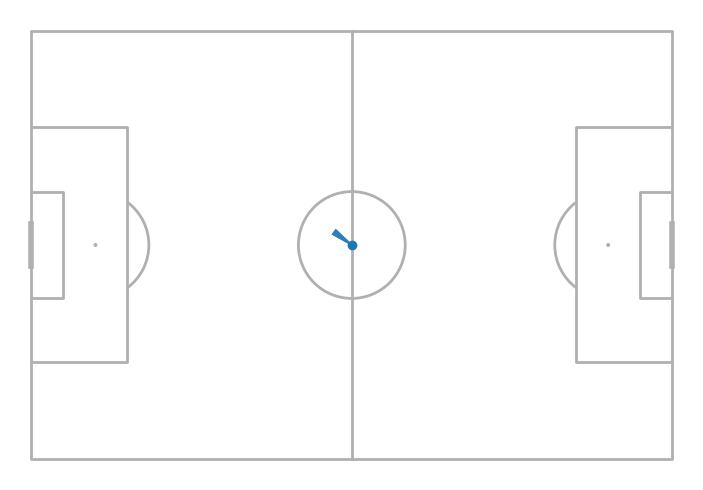

In [23]:
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(8,5))

p.scatter(x=KH29.x_start,y=KH29.y_start,ax=ax)
p.lines(xstart=KH29.x_start,ystart=KH29.y_start,xend=KH29.x_end,yend=KH29.y_end,ax=ax,comet=True)

# for x in KH29.iloc[0]['freeze_frame']:
#     if x['teammate']:
#         color='green'
#     else:
#         color='yellow'
#     p.scatter(x=x['location'][0],y=x['location'][1],ax=ax,c=color,s=100)

All of Endrick's successfull passes vs Uruguay